In [3]:
import pandas as pd
import numpy as np

import scipy.stats as stats    # For QQ plot


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [6]:
df = pd.read_csv('train.csv', usecols = ['Age', 'Fare', 'Survived'])

In [7]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [14]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [15]:
df['Age'].fillna(df['Age'].mean(), inplace = True)

In [16]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [17]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [18]:
X = df.iloc[:,1:3]
y = df.iloc[:,0]

In [19]:
X_train,X_test,y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

C:\Users\Hare Krishna\AppData\Local\Temp\ipykernel_24460\8782326.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])
C:\python3.7\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


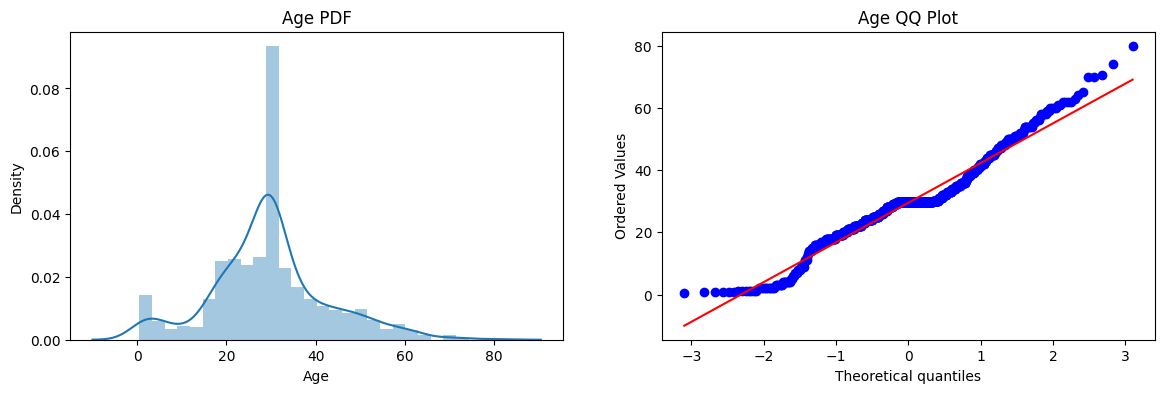

In [21]:
plt.figure(figsize = (14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title("Age PDF")

plt.subplot(122)
stats.probplot(X_train['Age'], dist='norm', plot = plt)
plt.title("Age QQ Plot")

plt.show()

C:\Users\Hare Krishna\AppData\Local\Temp\ipykernel_24460\1069419811.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])
C:\python3.7\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


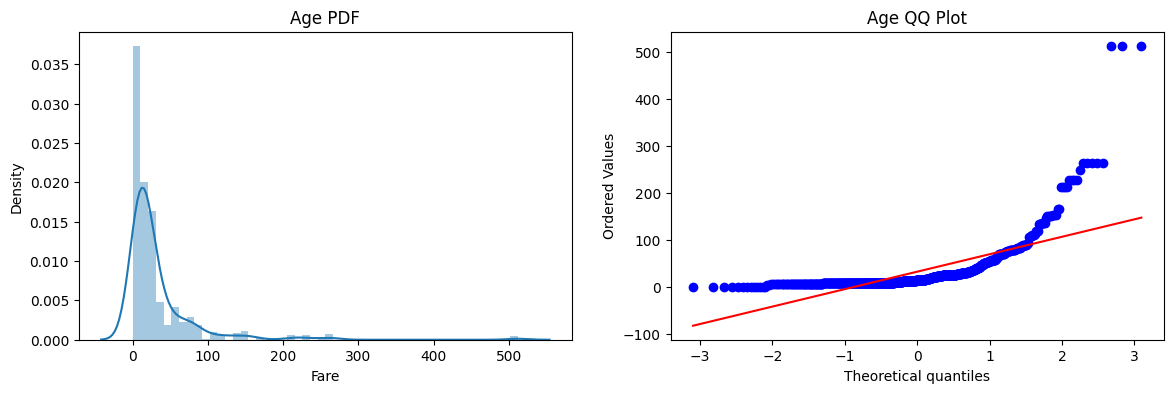

In [23]:
plt.figure(figsize = (14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title("Age PDF")

plt.subplot(122)
stats.probplot(X_train['Fare'], dist = 'norm', plot = plt)
plt.title("Age QQ Plot")

plt.show()

In [24]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [26]:
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)

y_pred1 = clf1.predict(X_test)
y_pred2 = clf2.predict(X_test)

print("Accuracy LR: ", accuracy_score(y_test, y_pred1))
print("Accuracy DTC: ", accuracy_score(y_test, y_pred2))

Accuracy LR:  0.6480446927374302
Accuracy DTC:  0.6815642458100558


In [28]:
trf =FunctionTransformer(func = np.log1p)    # Different b/w logp and Log1p is Log1p add 1 in the input data
#so that error will not error due to 0 May be possible in input data

In [29]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.fit_transform(X_test)

In [30]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [32]:
clf1.fit(X_train_transformed, y_train)
clf2.fit(X_train_transformed, y_train)

y_pred1 = clf1.predict(X_test_transformed)
y_pred2 = clf2.predict(X_test_transformed)

print("Accuracy LR: ", accuracy_score(y_test, y_pred1))
print("Accuracy DTC: ", accuracy_score(y_test, y_pred2))

Accuracy LR:  0.6815642458100558
Accuracy DTC:  0.6759776536312849


In [35]:
X_transformed = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR: ",np.mean(cross_val_score(clf, X_transformed,y, scoring = 'accuracy', cv = 10)))
print("DTC: ",np.mean(cross_val_score(clf2, X_transformed, y, scoring = 'accuracy', cv = 10)))

LR:  0.678027465667915
DTC:  0.6633208489388264


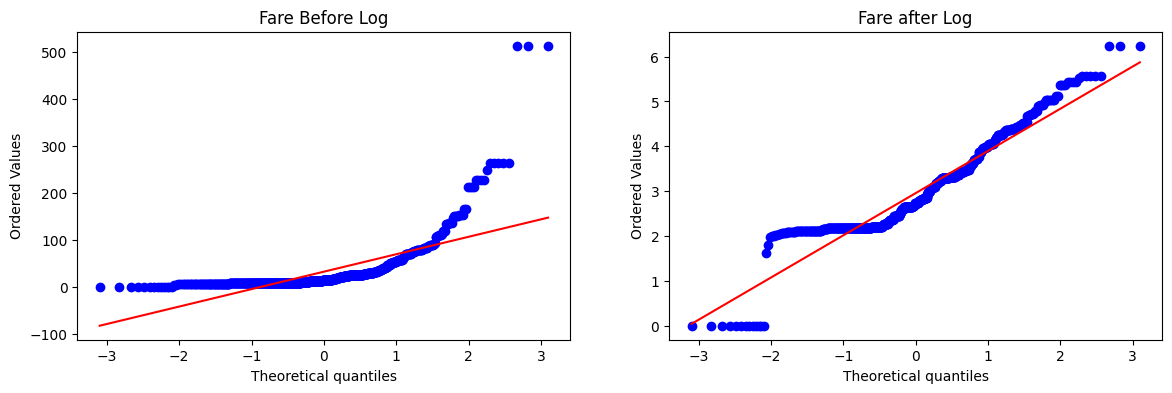

In [36]:
plt.figure(figsize = (14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist = 'norm', plot = plt)
plt.title("Fare Before Log")

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist = 'norm', plot = plt)
plt.title("Fare after Log")

plt.show()

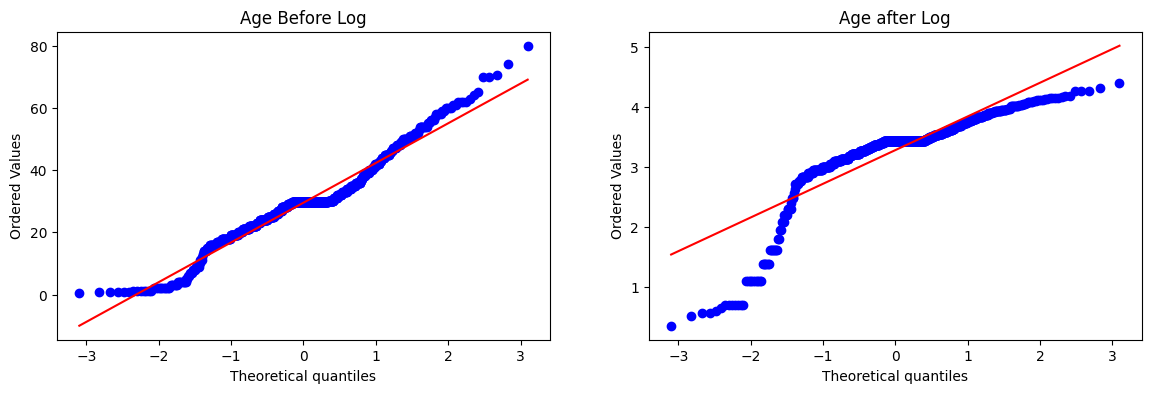

In [37]:
plt.figure(figsize = (14,4))

plt.subplot(121)
stats.probplot(X_train['Age'], dist = 'norm', plot = plt)
plt.title("Age Before Log")

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist = 'norm', plot = plt)
plt.title("Age after Log")

plt.show()

In [39]:
trf2 = ColumnTransformer([('log', FunctionTransformer(np.log1p), ['Fare'])], remainder = 'passthrough')

In [40]:
X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.fit_transform(X_test)

In [41]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf1.fit(X_train_transformed2, y_train)
clf2.fit(X_train_transformed2, y_train)

y_pred1 = clf1.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)

print("Accuracy LR: ", accuracy_score(y_test, y_pred1))
print("Accuracy DTC: ", accuracy_score(y_test, y_pred2))

Accuracy LR:  0.6703910614525139
Accuracy DTC:  0.6703910614525139


In [42]:
X_transformed2 = trf2.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR: ",np.mean(cross_val_score(clf, X_transformed2,y, scoring = 'accuracy', cv = 10)))
print("DTC: ",np.mean(cross_val_score(clf2, X_transformed2, y, scoring = 'accuracy', cv = 10)))

LR:  0.6712609238451936
DTC:  0.6633333333333333


In [46]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    trf = ColumnTransformer([('log', FunctionTransformer(transform), ['Fare'])], remainder = 'passthrough')
    X_train = trf.fit_transform(X)
    clf = LogisticRegression()
    print("Accuracy: ",np.mean(cross_val_score(clf, X_train, y, scoring = 'accuracy', cv = 10)))
    plt.figure(figsize = (14,4))
    plt.subplot(121)
    stats.probplot(X['Fare'], dist = 'norm', plot = plt)
    plt.title("Fare Before Transform")
    plt.subplot(122)
    stats.probplot(X["Fare"], dist = 'norm', plot = plt)
    plt.title("Fare After Transform")
    plt.show()

Accuracy:  0.6195131086142323


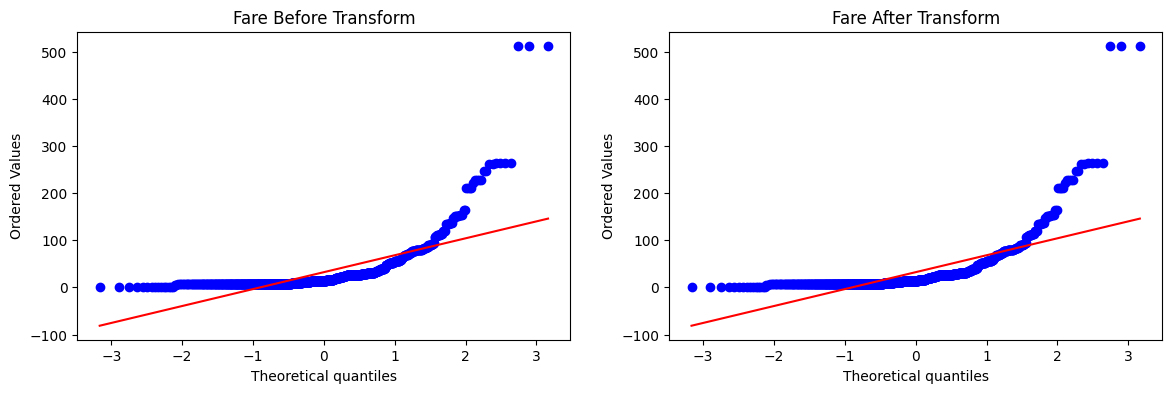

In [47]:
apply_transform(np.sin)

In [ ]:
apply_transform(lambda x: 1/(x+0000000000.1))   # Reciprocal

Accuracy:  0.61729088639201


Accuracy:  0.6442446941323345


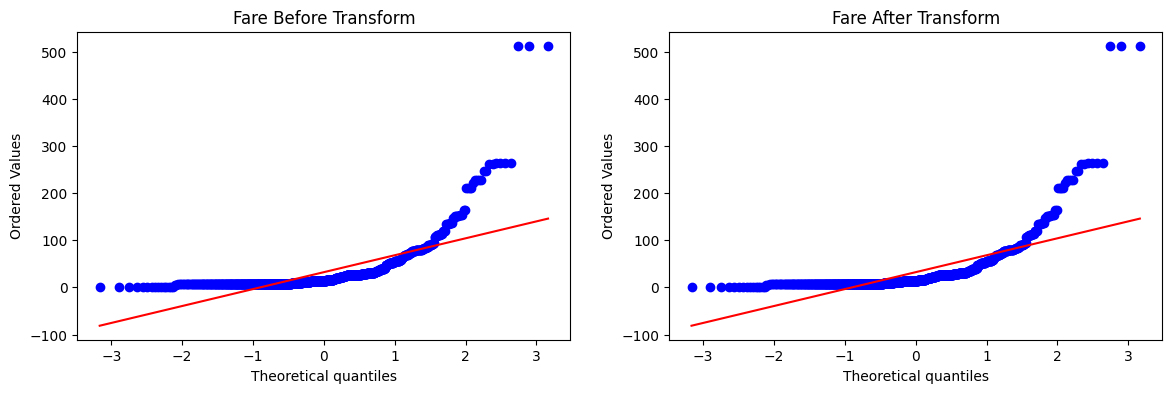

In [50]:
apply_transform(lambda x: x**2) # squre

Accuracy:  0.39843945068664166


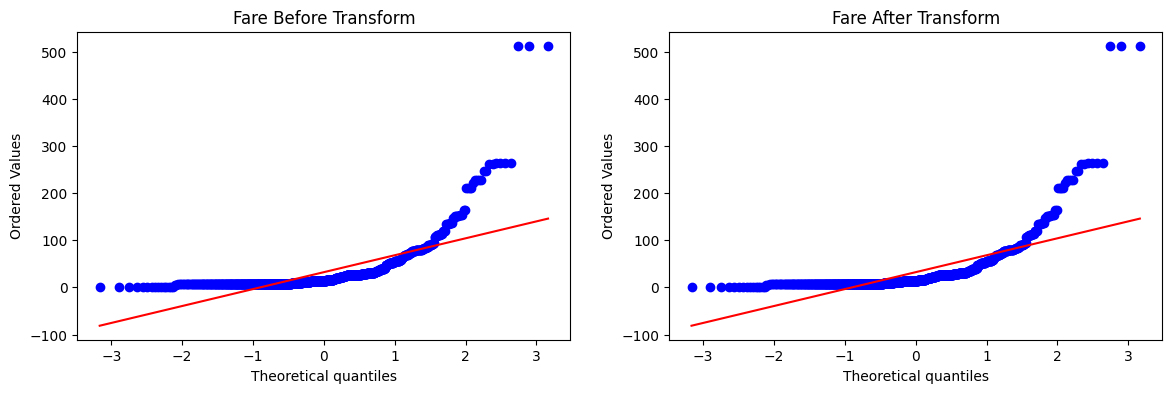

In [51]:
apply_transform(lambda x: x**3)   # cube

Accuracy:  0.6589013732833957


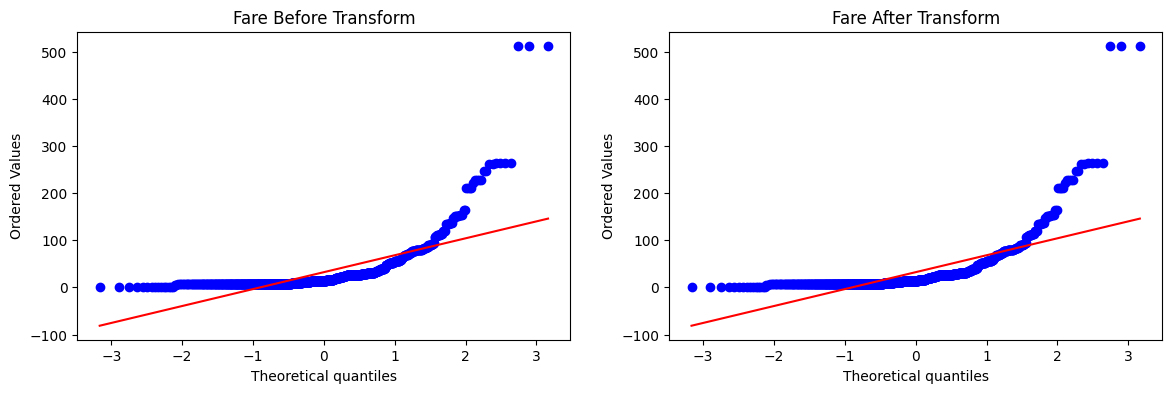

In [52]:
apply_transform(lambda x: x**1/2)  # squre root